# 1. Import Library

In [1]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

Instructions for updating:
non-resource variables are not supported in the long term


# 数据准备

In [3]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [4]:
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [6]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [7]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

In [10]:
#卷积层1+池化层1

In [11]:
model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32,3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷积层2+池化层2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#卷积层3+池化层3

In [15]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立多层感知器

In [17]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

# 载入之前训练的模型

In [19]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew.h5")
    print("载入模型成功!继续训练模型")
except :    
    print("载入模型失败!开始训练一个新模型")

载入模型失败!开始训练一个新模型


# 训练模型

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [21]:
train_history=model.fit(X_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=300, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - ETA: 0s - loss: 1.9809 - acc: 0.2587

C:\Users\ham\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2355: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


40000/40000 [==============================] - 32s 801us/sample - loss: 1.9809 - acc: 0.2587 - val_loss: 2.2264 - val_acc: 0.2345
Epoch 2/10
40000/40000 [==============================] - 25s 613us/sample - loss: 1.5299 - acc: 0.4356 - val_loss: 1.4772 - val_acc: 0.4629
Epoch 3/10
40000/40000 [==============================] - 24s 597us/sample - loss: 1.3181 - acc: 0.5214 - val_loss: 1.3670 - val_acc: 0.5084
Epoch 4/10
40000/40000 [==============================] - 23s 584us/sample - loss: 1.1597 - acc: 0.5828 - val_loss: 1.1214 - val_acc: 0.6105
Epoch 5/10
40000/40000 [==============================] - 23s 585us/sample - loss: 1.0304 - acc: 0.6329 - val_loss: 1.0000 - val_acc: 0.6526
Epoch 6/10
40000/40000 [==============================] - 23s 586us/sample - loss: 0.9408 - acc: 0.6693 - val_loss: 0.9774 - val_acc: 0.6654
Epoch 7/10
40000/40000 [==============================] - 23s 585us/sample - loss: 0.8598 - acc: 0.6956 - val_loss: 0.8934 - val_acc: 0.6854
Epoch 8/10
40000/40000 [

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

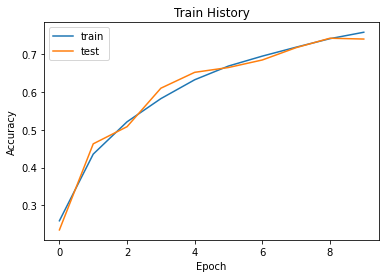

In [23]:
show_train_history('acc','val_acc')

In [38]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

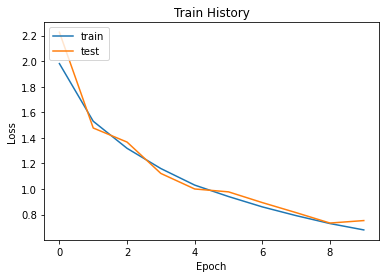

In [39]:
show_train_history('loss','val_loss')

# 评估模型准确率

In [25]:
scores = model.evaluate(X_img_test_normalize, 
                        y_label_test_OneHot,verbose=0)
scores[1]

0.7382

# 进行预测

In [26]:
prediction=model.predict_classes(X_img_test_normalize)

C:\Users\ham\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\sequential.py:459: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\ham\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2355: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [27]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 3, 6, 4, 1], dtype=int64)

In [28]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [29]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

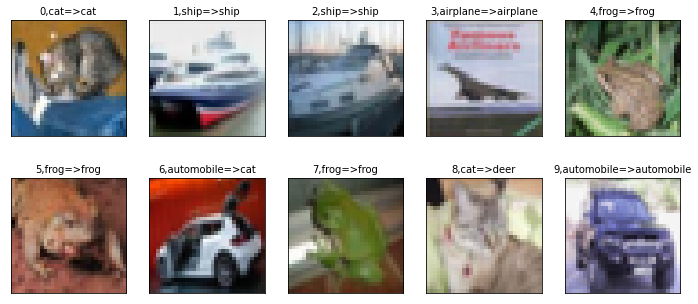

In [30]:
plot_images_labels_prediction(X_img_test_normalize,y_label_test,
                              prediction,0,10)

# 查看预测概率

In [31]:
Predicted_Probability=model.predict(X_img_test_normalize)

In [32]:
def show_Predicted_Probability(X_img,Predicted_Probability,i):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(X_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

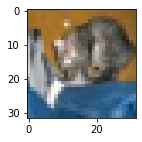

airplane Probability:0.001935323
automobile Probability:0.064410493
bird Probability:0.063483417
cat Probability:0.438733727
deer Probability:0.017910384
dog Probability:0.114975415
frog Probability:0.063350625
horse Probability:0.010573945
ship Probability:0.080186926
truck Probability:0.144439802


In [33]:
show_Predicted_Probability(X_img_test,Predicted_Probability,0)

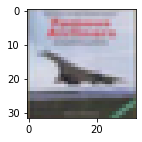

airplane Probability:0.555861175
automobile Probability:0.001172814
bird Probability:0.098807454
cat Probability:0.009559784
deer Probability:0.022568973
dog Probability:0.000348647
frog Probability:0.000277112
horse Probability:0.000481522
ship Probability:0.309844077
truck Probability:0.001078457


In [34]:
show_Predicted_Probability(X_img_test,Predicted_Probability,3)

# Save model to JSON

In [35]:
model_json = model.to_json()
with open("SaveModel/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Model to YAML

In [36]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)


# Save Weight to h5 

In [37]:
model.save_weights("SaveModel/cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
